# TP 5

# Laplacian
We will study the Laplacian
$$ \nabla^2 C$$
where $C$ is some scalar or vectorial field. 
The Laplacian operator is widely used in various fields such as physics, mathematics, and engineering, 
some equations involving the Laplacian are:

1. **Poisson's Equation**:
    $$ \nabla^2 \phi = \rho $$

2. **Heat Equation**:
    $$ \frac{\partial T}{\partial t} = \alpha \nabla^2 T $$

3. **Wave Equation**:
    $$ \frac{\partial^2 u}{\partial t^2} = c^2 \nabla^2 u $$

4. **Schrödinger Equation**:
    $$ i\hbar \frac{\partial \psi}{\partial t} = -\frac{\hbar^2}{2m} \nabla^2 \psi + V\psi $$

5. **Laplace's Equation**:
    $$ \nabla^2 \phi = 0 $$

6. **Helmoltz equation**
$$ \nabla (D \nabla  A) - \lambda A = B$$

The work to do is divided in two parts
- A : The study of the diffusion equation in 1D
- B : The study of the diffusion equation in 2D using iterative methods


## A Diffusion Equation

The Diffusion equation  can be written as:

$$ \frac{\partial C}{\partial t} = \alpha \frac{\partial^2 C}{\partial x^2} $$

where:
- $ C $ is a scalar field,
- $ t $ is the time,
- $ x $ is the spatial coordinate,
- $D$ is the diffusion coefficient

The initial condition is:

$ C(x, 0) = \sin(2 \pi x) $

The boundary conditions are typically set to zero (Dirichlet boundary conditions):

$$ C(0, t) = 0 $$
$$ C(L, t) = 0 $$

where $L$ is  the length of the domain.

### 1.1 Verification
Using the Python library sympy verify that
$$ C = \frac{C_{0} \pi e^{- \frac{x^{2}}{4 D t}}}{\sqrt{D t}} $$
is a solution

In [1]:
import sympy as sp

In [27]:
C0,pi,D,L= sp.symbols('C0,pi,D,L')
x, t = sp.symbols('x t')
f = C0*sp.exp(-D*pi*pi/L/L*t) * sp.sin(pi/L*x)
f

C0*exp(-D*pi**2*t/L**2)*sin(pi*x/L)

In [3]:
sp.diff(f,t) - D * sp.diff(sp.diff(f, x),x)

0

In [28]:
f = f.subs({C0:1, D:1, L:1,t:0.5, pi:sp.pi})
f

exp(-0.5*pi**2)*sin(pi*x)

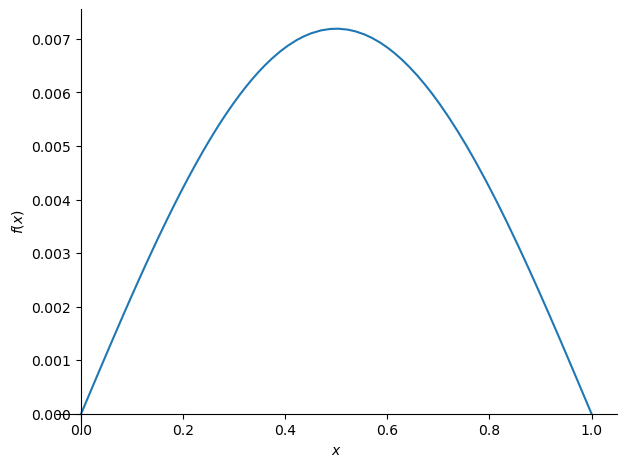

In [29]:
f = f.subs({C0:1, D:1, L:1,t:0.5, pi:sp.pi})
sp.plot(f, (x,0,1))

### 1.2 Finite Differences Scheme

In the finite differences scheme, we discretize the spatial and temporal domains to approximate the derivatives in the heat equation. The spatial domain is divided into \( nx \) grid points with spacing \( dx \), and the time domain is divided into \( nt \) time steps with spacing \( dt \).

The diffusion equation with a source term is given by:

$$ \frac{\partial C}{\partial t} = D \frac{\partial^2 C}{\partial x^2} $$

Using finite differences, the second spatial derivative can be approximated as:

$$ \frac{\partial^2 C}{\partial x^2} \approx \frac{C_{i-1} - 2C_i + C_{i+1}}{\Delta_x ^2} $$

The forward Euler method is used for the time derivative:

$$ \frac{\partial C}{\partial t} \approx \frac{C^{n+1} - C^n}{\Delta t} $$

Combining these approximations, the update formula for the temperature at the next time step is:

$$ C_i^{n+1} = C_i^n + \frac{D  \Delta t}{\Delta_x ^2} \left( C_{i-1}^n - 2C_i^n + C_{i+1}^n  \right) $$

where:
- $C_i^n$ is the scalar at spatial position $ x_i$ and time $ t_n $,
- $D$ is the diffusion coefficient,


The initial condition is:

$$ C(x, 0) = \sin(2 \pi x) $$

The boundary conditions are typically set to zero (Dirichlet boundary conditions):

$$ C(0, t) = 0 $$
$$ C(L, t) = 0 $$

where $ L$ is the length of the domain.

In [81]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [82]:
# Physical parameters
D = 1                  # Diffusion coefficient
L = 1.                         # Size of computational domain

# Grid parameters
nx = 100                        # number of grid points 
dx = L / (nx-1)                # grid spacing
x = np.linspace(0., L, nx)     # coordinates of grid points

# Time parameters
ti = 0.                         # initial time
tf = 5.                         # final time

dt = 0.0001

nt = int((tf-ti) / dt)          # number of time steps

# Initial condition
T0 = np.sin(np.pi*x)          # initial condition


dt = 4.999489847974697e-05


### Fourrier analyse (optional)
You can suppose the domain periodic and to apply a Fourrier analyse


In [ ]:
## porf
fourier = 0.49                  # Fourier number
dt = fourier*dx**2/alpha        # time step

### 1.2.1. Euler step
Write a Euler step fot the diffusion equation (see previous work)

In [83]:
def euler_step(u, f, dt, *args):
    """Returns the solution at the next time-step using 
    the forward Euler method.
    
    Parameters
    ----------
    u : array of floats
        solution at the current time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    args : optional arguments for the rhs function
    
    Returns
    -------
    unp1 : array of floats
        approximate solution at the next time step.
    """
    unp1 = u + dt * f(u, *args)
    return unp1

### RHS of Euler equation

In [86]:
def rhs_centered(T, dx, alpha):
    """Returns the right-hand side of the 1D heat
    equation based on centered finite differences
    
    Parameters
    ----------
    T : array of floats
        solution at the current time-step.
    dx : float
        grid spacing
    alpha : float
        heat conductivity
    source : array of floats
        source term for the heat equation
    
    Returns
    -------
    f : array of floats
        right-hand side of the heat equation with
        Dirichlet boundary conditions implemented
    """
    nx = T.shape[0]
    f = np.empty(nx)
    
    f[1:-1] = alpha/dx**2 * (T[:-2] - 2*T[1:-1] + T[2:]) 
    f[0] = 0.
    f[-1] = 0.
    
    return f

### 1.2.2 Exact solution 
From point 1 write a function giving the exact solution

In [54]:
def exact_solution(x,t, D=1, L=1):
    """Returns the exact solution of the 1D
    heat equation with heat source term sin(np.pi*x)
    and initial condition sin(2*np.pi*x)
    
    Parameters
    ----------
    x : array of floats
        grid points coordinates
    t: float
        time
    
    Returns
    -------
    f : array of floats
        exact solution
    """
    # Note the 'Pythonic' way to break the long line. You could
    # split a long line using a backlash (\) but the conventional
    # way is to embrace your code in parenthesis.
    #
    # For more info we refer you to PEP8:
    # https://www.python.org/dev/peps/pep-0008/#id19 
    f =  np.exp(-D*np.pi**2/L/L*t) * np.sin(np.pi/L*x)
    #f = (np.exp(-4*np.pi**2*alpha*t) * np.sin(2*np.pi*x)
    #  + 2.0*(1-np.exp(-np.pi**2*alpha*t)) * np.sin(np.pi*x) 
    #  / (np.pi**2*alpha))
    
    return f

### 1.2.3 Solving
Solve the diffusion equation with the Euler method with the given parameters

In [87]:
T = np.empty((nt+1, nx))
T[0] = T0.copy()

for i in range(nt):
    T[i+1] = euler_step(T[i], rhs_centered, dt, dx, D)

### 1.2.4 Plotting
Plot the solutions *exact and numerical* for a given time

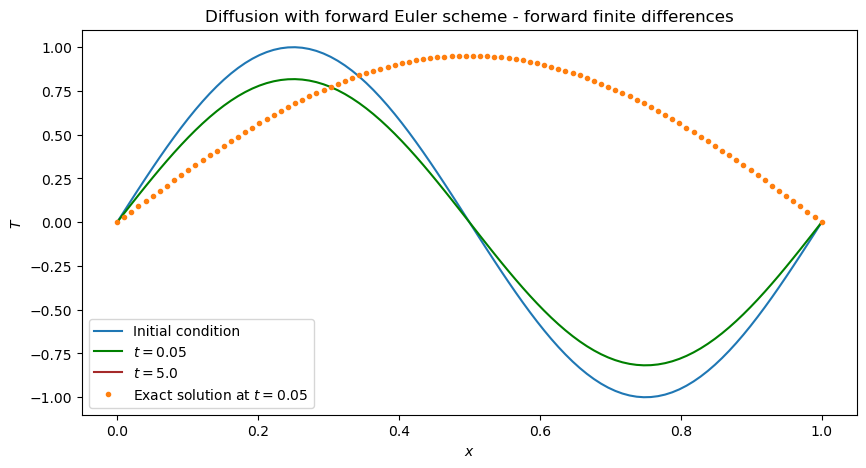

In [107]:
# plot the solution at several times
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, T[0], label='Initial condition')
ax.plot(x, T[int(0.05/dt)], color='green', label='$t=0.05$')
ax.plot(x, T[-1], color='brown', label=f'$t={tf}$')
ax.plot(x, exact_solution(x, 0.05, D), '.', label='Exact solution at $t=0.05$')


ax.set_xlabel('$x$')
ax.set_ylabel('$T$')
ax.set_title('Diffusion with forward Euler scheme'
             ' - forward finite differences')
ax.legend();

## 1.3 Implicit Method for the Diffusion Equation

In the implicit method, we discretize the spatial and temporal domains to approximate the derivatives in the diffusion equation. The spatial domain is divided into \( nx \) grid points with spacing \( dx \), and the time domain is divided into \( nt \) time steps with spacing \( dt \).

The diffusion equation is given by:

$$ \frac{\partial C}{\partial t} = D \frac{\partial^2 C}{\partial x^2} $$

Using finite differences, the second spatial derivative can be approximated as:

$$ \frac{\partial^2 C}{\partial x^2} \approx \frac{C_{i-1} - 2C_i + C_{i+1}}{\Delta x^2} $$

The backward Euler method is used for the time derivative:

$$ \frac{\partial C}{\partial t} \approx \frac{C^{n+1} - C^n}{\Delta t} $$

Combining these approximations, the update formula for the temperature at the next time step is:

$$ C_i^{n+1} - \frac{D \Delta t}{\Delta x^2} \left( C_{i-1}^{n+1} - 2C_i^{n+1} + C_{i+1}^{n+1} \right) = C_i^n $$

This can be rearranged into a system of linear equations:

$$ \left( 1 + 2\frac{D \Delta t}{\Delta x^2} \right) C_i^{n+1} - \frac{D \Delta t}{\Delta x^2} \left( C_{i-1}^{n+1} + C_{i+1}^{n+1} \right) = C_i^n $$

This system *A x = b* can be solved using matrix methods, where the matrix represents the coefficients of $ C_i^{n+1}$ and the right-hand side represents $C_i^n$.

The initial condition is:

$$ C(x, 0) = \sin(2 \pi x) $$

The boundary conditions are typically set to zero (Dirichlet boundary conditions):

$$ C(0, t) = 0 $$
$$ C(L, t) = 0 $$

where $ L $ is the length of the domain.

In [17]:
import scipy.sparse as sps
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

In [42]:
# test
n = 10
d1 = np.ones(n)
d0 = -2 * np.ones(n)
A = sps.spdiags([d1,d0,d1], [-1,0,1],n,n,format='csc')
A[0,0] = A[-1,-1]= 1
A[0,1] = A[-1,-2]= 0
#print(A)
print(A.todense())
B = np.ones(n)  
spsolve(A,B)
print(A.shape, B.shape)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
(10, 10) (10,)


### 1.3.1 Writing sparse matrix from Diffusion equation
Write sparse matrix for the diffusion problem

In [89]:
#dt = 0.1
r = D * dt / dx**2
d1 = r *np.ones(nx)
d0 = -(1 + 2 * r)* np.ones(nx)
#diagonals = [-(1 + 2 * r) * np.ones(nx), r * np.ones(nx - 1), r * np.ones(nx - 1)]
A = sps.spdiags([d1,d0,d1], [-1,0,1],nx,nx,format='csc')
A[0,0] = A[-1,-1]= 1
A[0,1] = A[-1,-2]= 0
#B = np.ones(nx)
#print(A.shape, B.shape)
#spsolve(A,B)

### 1.3.2 Solving
Use a sparse solver ('spsolve') to solve the diffusion problem

In [90]:
T = np.empty((nt+1, nx))
T[0] = T0.copy()

for i in range(nt):
    T[i+1] = spsolve(A,T[i])

### 1.3.3 Plotting
Plot the solutions *exact and numerical* for a given time

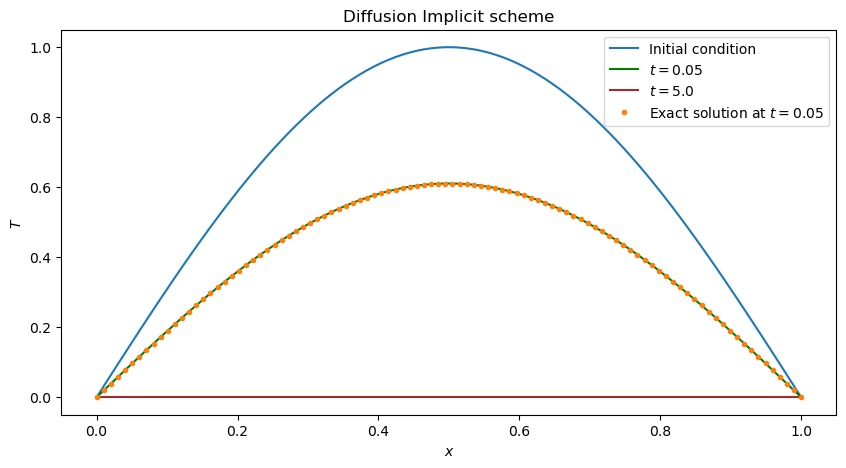

In [92]:
# plot the solution at several times
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, T[0], label='Initial condition')
ax.plot(x, T[int(0.05/dt)], color='green', label='$t=0.05$')
ax.plot(x, T[-1], color='brown', label=f'$t={tf}$')
ax.plot(x, exact_solution(x, 0.05, D), '.', label='Exact solution at $t=0.05$')


ax.set_xlabel('$x$')
ax.set_ylabel('$T$')
ax.set_title('Diffusion Implicit scheme')
ax.legend();

## 1.4 Compare both approaches 
Compare explicit and implicit approach. Do several sytability analyse

In [112]:
# Physical parameters
D = 0.1                    # Heat transfer coefficient
L = 1.                        # Size of computational domain
ti = 0.0                       # Initial time
tf = 5.0                       # Final time

# Grid parameters
nx = 100                    # number of grid points
dx = L/ (nx-1)               # grid spacing
x = np.linspace(0., L, nx)    # coordinates of grid points

dt = 0.01 
nt = int((tf-ti) / dt)              # number of time steps

# Solution parameters
T0 = np.sin(np.pi*x)              # initial condition




In [113]:
Timp = np.empty((nt+1, nx))
Timp[0] = T0.copy()

for i in range(nt):
    Timp[i+1] = spsolve(A,Timp[i])

In [114]:
T = np.empty((nt+1, nx))
T[0] = T0.copy()

for i in range(nt):
    T[i+1] = euler_step(T[i], rhs_centered, dt, dx, D)

/tmp/ipykernel_1534415/2547315970.py:25: RuntimeWarning: overflow encountered in multiply
  f[1:-1] = alpha/dx**2 * (T[:-2] - 2*T[1:-1] + T[2:])
/tmp/ipykernel_1534415/522121506.py:20: RuntimeWarning: invalid value encountered in add
  unp1 = u + dt * f(u, *args)
/tmp/ipykernel_1534415/2547315970.py:25: RuntimeWarning: invalid value encountered in subtract
  f[1:-1] = alpha/dx**2 * (T[:-2] - 2*T[1:-1] + T[2:])


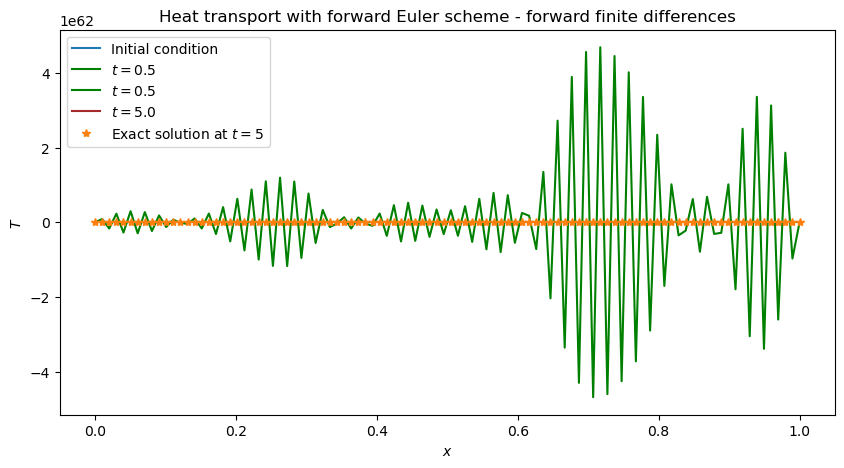

In [116]:
# plot the solution at several times
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, T[0], label='Initial condition')
ax.plot(x, T[int(0.5/dt)], color='green', label='$t=0.5$')
ax.plot(x, Timp[int(0.05/dt)], color='green', label='$t=0.5$')

ax.plot(x, T[-1], color='brown', label=f'$t={tf}$')
ax.plot(x, exact_solution(x, 0.05, D), '*', label='Exact solution at $t=5$')


ax.set_xlabel('$x$')
ax.set_ylabel('$T$')
ax.set_title('Heat transport with forward Euler scheme'
             ' - forward finite differences')
ax.legend();

## 2 Diffusion equation in 2D
Inverting matrices for diffusion equation can be complicated, then we propose to study some iterative approaches.

We study first the Laplace equation 

$$ \nabla^2 C = 0 $$



The 5-point Laplacian is a finite difference approximation of the Laplace operator in two dimensions. It is commonly used in numerical methods to solve partial differential equations such as the Poisson equation. The Laplace operator in Cartesian coordinates is given by:

$$ \nabla^2 C = \frac{\partial^2 C}{\partial x^2} + \frac{\partial^2 C}{\partial y^2} $$

Using the 5-point stencil, the discrete approximation of the Laplacian at a grid point $(i, j)$ is:

$$ \nabla^2 C_{i,j} \approx \frac{C_{i+1,j} - 2C_{i,j} + C_{i-1,j}}{\Delta x^2} + \frac{C_{i,j+1} - 2C_{i,j} + C_{i,j-1}}{\Delta y^2} $$

For a uniform grid where $\Delta x = \Delta y = h$, this simplifies to:

$$ \nabla^2 C_{i,j} \approx \frac{C_{i+1,j} + C_{i-1,j} + C_{i,j+1} + C_{i,j-1} - 4C_{i,j}}{h^2} $$

This formula is used to approximate the second derivatives in the Laplace equation, providing a way to discretize the equation for numerical solutions.

In [126]:
import matplotlib as ml
def showsol(sol):
    plt.imshow(sol.T,cmap=ml.cm.Blues,interpolation='none',origin='lower')

### 2.1.1 Jacobi Approach

In [128]:
def jacobi(grid):
    newgrid = np.zeros(shape=grid.shape,dtype=grid.dtype)

    # apply evolution operator
    newgrid[1:-1,1:-1] = 0.25 * (grid[1:-1,:-2] + grid[1:-1,2:] +
                                 grid[:-2,1:-1] + grid[2:,1:-1])

    # copy boundary conditions
    newgrid[0,:]  = grid[0,:]
    newgrid[-1,:] = grid[-1,:]
    newgrid[:,0]  = grid[:,0]
    newgrid[:,-1] = grid[:,-1]
    
    return newgrid

### 2.1.2 Initial condition
Random initial condition

In [118]:
def initgrid(gridsize):
    x = np.random.randn(gridsize,gridsize)
    boundary(x)
    
    return x

In [120]:
def boundary(grid):
    x = np.linspace(0,1,len(grid))
    
    grid[0,:]  = np.interp(x,[0,1],[0,1])
    grid[:,-1] = np.interp(x,[0,1],[1,0])
    grid[-1,:] = np.interp(x,[0,1],[-1,0])
    grid[:,0]  = np.interp(x,[0,1],[0,-1])

###  2.2.3 Solving Laplace equation

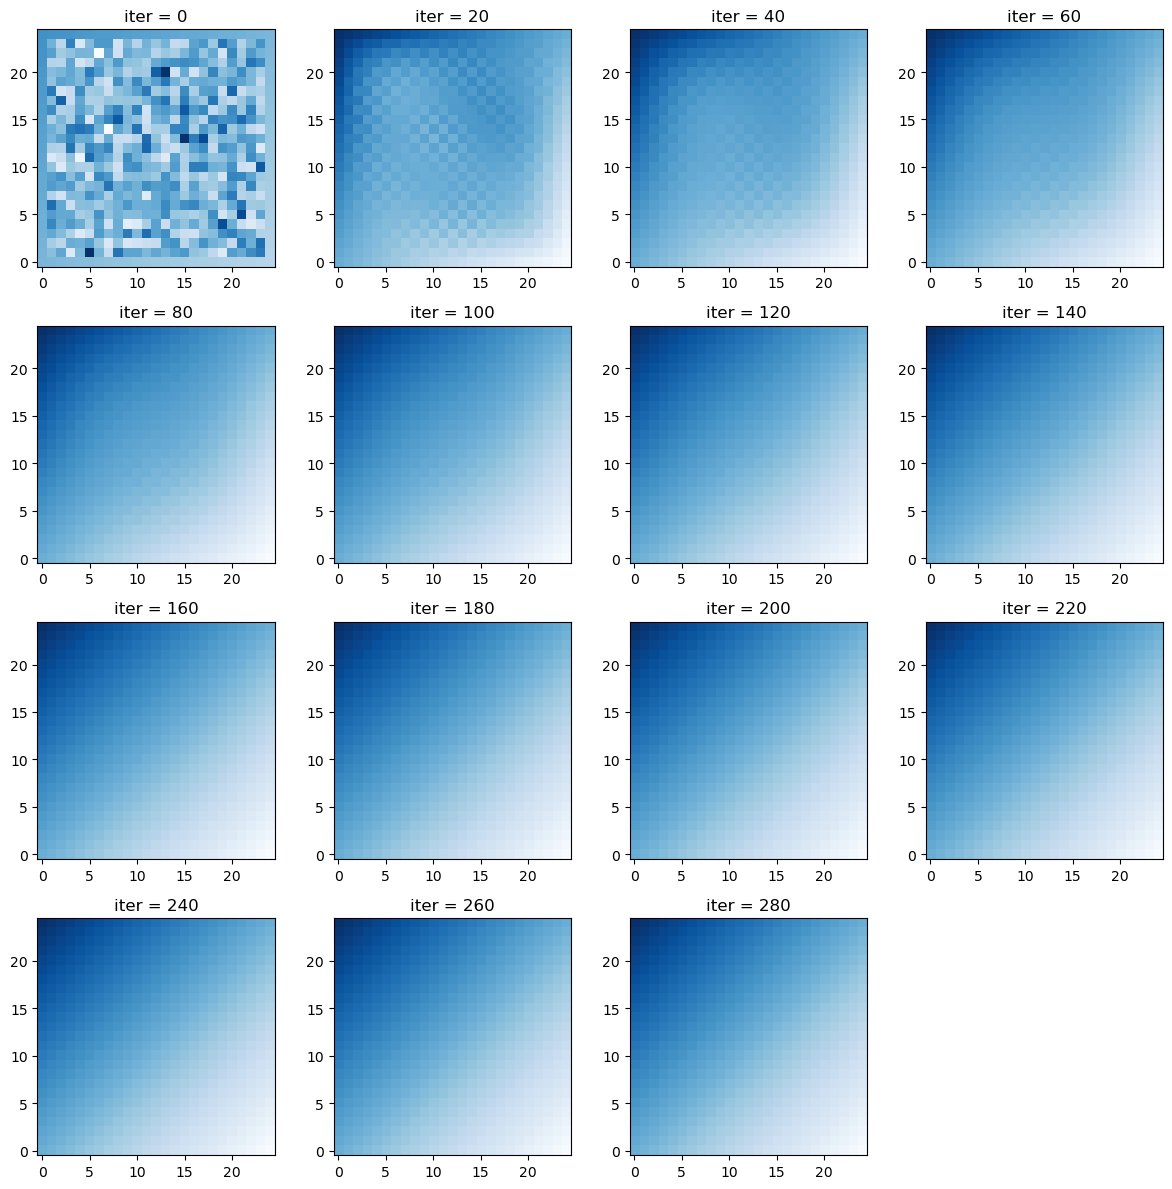

In [129]:
x = initgrid(25)

plt.figure(figsize=(12,12))

for i in range(300):    
    if i % 20 == 0:
        plt.subplot(4,4,int(i/20+1))
        showsol(x)
        plt.title('iter = %s' % i)
        
    x = jacobi(x)

plt.tight_layout()

### 2.2.4 Convergence
Do a convergence analyse (use final solution as *target*)

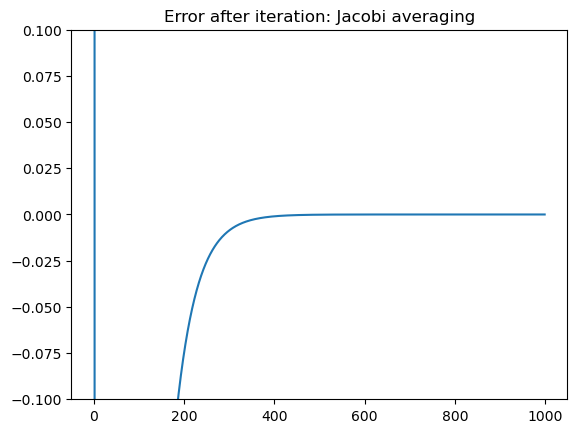

In [150]:
x = initgrid(25)

err_jacobi = []

for i in range(1000):    
    err_jacobi.append((i,np.linalg.norm(x)))
            
    x = jacobi(x)

err_jacobi = np.array(err_jacobi)
    
#plt.semilogy(err_jacobi[:,0],err_jacobi[:,1]-err_jacobi[-1,1])
plt.plot(err_jacobi[:,0],err_jacobi[:,1]-err_jacobi[-1,1])
plt.ylim(-0.1,0.1)
plt.title('Error after iteration: Jacobi averaging');

### 2.3 Gauss Siedel
Use now the updated values

In [151]:
def gauss_seidel(grid):
    newgrid = grid.copy()
    
    for i in range(1,newgrid.shape[0]-1):
        for j in range(1,newgrid.shape[1]-1):
            newgrid[i,j] = 0.25 * (newgrid[i,j+1] + newgrid[i,j-1] +
                                   newgrid[i+1,j] + newgrid[i-1,j])
    Poisson
    return newgrid

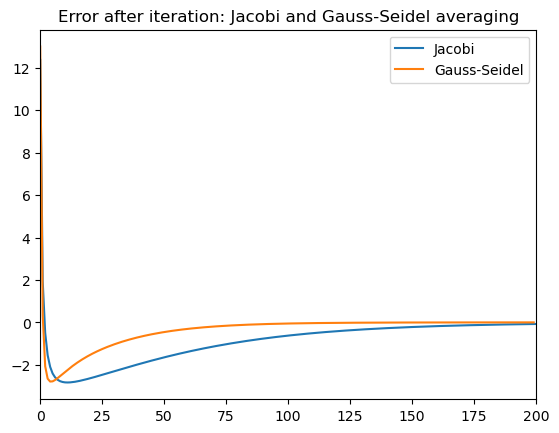

In [156]:
x = initgrid(25)

err_gs = []

for i in range(200):    
    err_gs.append((i,np.linalg.norm(x)))
            
    x = gauss_seidel(x)

err_gs = np.array(err_gs)
    
plt.plot(err_jacobi[:,0],err_jacobi[:,1]-err_jacobi[-1,1])
plt.plot(err_gs[:,0],err_gs[:,1]-err_gs[-1,1])
plt.xlim(0,200)
plt.title('Error after iteration: Jacobi and Gauss-Seidel averaging')
plt.legend(['Jacobi','Gauss-Seidel']);



## 3 Poisson-Helmholtz Equation

The Poisson-Helmholtz equation is a partial differential equation that combines aspects of both the Poisson and Helmholtz equations. It is commonly used in various fields such as physics and engineering to describe phenomena like wave propagation, electrostatics, and heat conduction.

The general form of the Poisson-Helmholtz equation is:

$$ \nabla (D \nabla  A) - \lambda A = B$$

where:
- \( \nabla^2 \) is the Laplace operator.
- \( \phi \) is the potential function.
- \( k \) is the wave number.
- \( \rho \) is the source term.

In the context of numerical methods, solving the Poisson-Helmholtz equation typically involves discretizing the equation using finite difference or finite element methods and then solving the resulting system of linear equations.

We will use the Poisson-Helmoltz solver for 2D heat equations.

For a coefficient $D$ constant now we look for iterative solutions of
$$ \nabla (D \nabla  A) - \lambda A = B$$
then
$$ D  (u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1} - 4 u_{i,j}) - \lambda  u_{i,j} =  b_{i,j}$$

The iterative algorithm is
$$ u_{i,j} = {- b_{i,j} + D  (u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1}) \over 4 D + \lambda}$$

## 3.1 Solve again Laplace equation
With $B=\lambda = 0$ to test the algorithm

In [165]:
def poisson_helmoltz(u,D,l,b):
    newa = np.zeros(shape=u.shape,dtype=u.dtype)

     # copy boundary conditions
    newa[0,:]  = u[0,:]
    newa[-1,:] = u[-1,:]
    newa[:,0]  = u[:,0]
    newa[:,-1] = u[:,-1]

    # apply evolution operator
    newa[1:-1,1:-1] = (-b[1:-1,1:-1]+D*(u[1:-1,:-2] + u[1:-1,2:] +
                                 u[:-2,1:-1] + u[2:,1:-1]))/(4*D+l)

  
    
    return newa

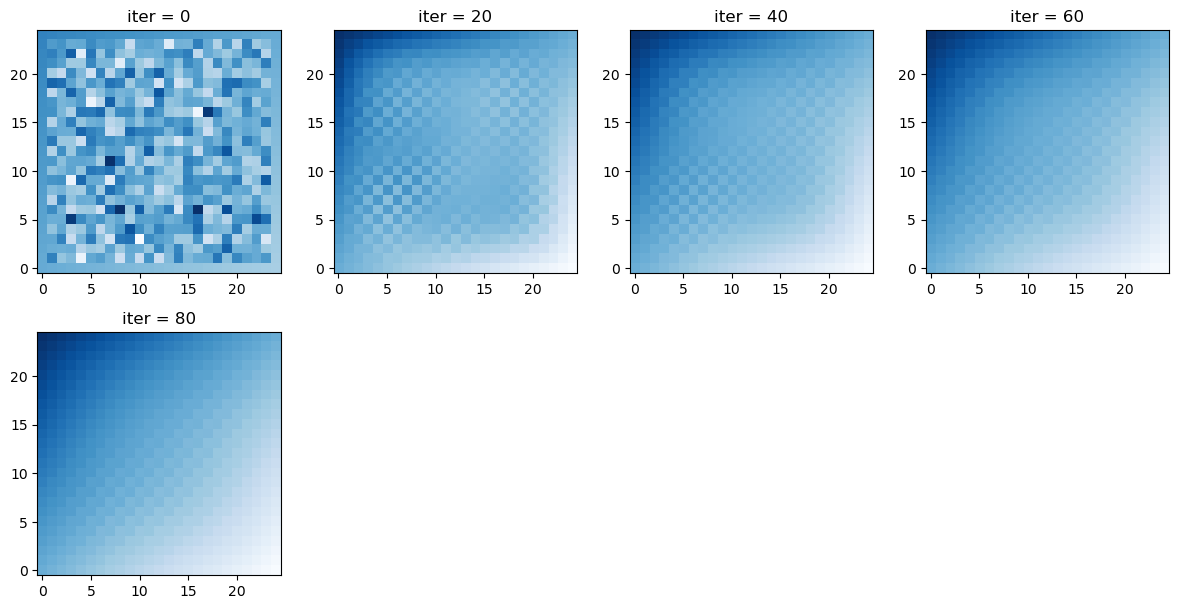

In [168]:
x = initgrid(25)

B = np.zeros(shape=(25,25),dtype='d')

plt.figure(figsize=(12,12))

for i in range(100):    
    if i % 20 == 0:
        plt.subplot(4,4,int(i/20+1))
        showsol(x)
        plt.title('iter = %s' % i)
        
    x = poisson_helmoltz(x,D,0.,B)

plt.tight_layout()

### 3.2 Compare
Compare 

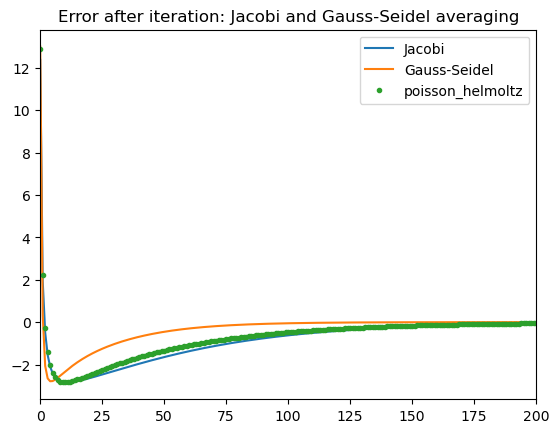

In [172]:
x = initgrid(25)


err_phelmoltz = []

for i in range(1000):    
    err_phelmoltz.append((i,np.linalg.norm(x)))
            
    x = poisson_helmoltz(x,D,0.,B)

err_phelmoltz = np.array(err_phelmoltz)
    
plt.plot(err_jacobi[:,0],err_jacobi[:,1]-err_jacobi[-1,1])
plt.plot(err_gs[:,0],err_gs[:,1]-err_gs[-1,1])
plt.plot(err_phelmoltz[:,0],err_phelmoltz[:,1]-err_phelmoltz[-1,1],'.')
plt.xlim(0,200)
plt.title('Error after iteration: Jacobi and Gauss-Seidel averaging')
plt.legend(['Jacobi','Gauss-Seidel','poisson_helmoltz']);

### 3.3 Gauss-Siegel
Do some improvements to the Poisson-Helmoltz algorithm

## 4 Reaction-Diffusion equation

The general reaction-diffusion equation is
$$ \frac{\partial u}{\partial t} = D \nabla^2 u + \beta u + R$$
the discrete implicit version is
$$ \frac{u^{n+1} - u^n}{\Delta t} =  D \nabla^2 u^{n+1} + \beta u^{n+1} + R$$
We can write it in a Poisson-Helmoltz form
$$ D \nabla^2 u^{n+1} + (\beta  - \frac{1}{dt}) u^{n+1} = - \frac{1}{dt} u^n - R $$
where
- $\lambda = \beta  - \frac{1}{dt}$
- $B =  -\frac{1}{dt} u^n - R $
then
$$ D \nabla^2 u^{n+1} + \lambda u^{n+1} = B$$

You have now a algorithm to solve Reaction-diffusion problems in 2D